In [1]:
import pandas as pd

# Load the datasets
subscriber_data = pd.read_csv('SubscribersData.csv')
activity_data = pd.read_csv('ActivityData.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'SubscriberData.csv'

In [3]:
import pandas as pd

# Load the datasets
subscriber_data = pd.read_csv('SubscribersData.csv')
activity_data = pd.read_csv('ActivityData.csv')

In [5]:
# Print the first 10 rows of each dataset
print(subscriber_data.head(10))
print(activity_data.head(10))


   SubscriberIdentityNumber  Phone Number Subscriber Name        SSN  \
0           345278656547333    1654788999            Mike  214448881   
1           345278666547334    1888777222            John  214448882   
2           345278676547335    1122765445           James  214448883   
3           345278686547336            10          Robert  214448884   
4           345278696547337    1590741891          Thomas  214448885   
5           345278706547338            20         Charles  214448886   
6           345278716547339    1058718337             Sam  214448887   
7           345278726547340    1292706560          Antony  214448888   
8           345278736547341    1526694783             Raj  214448889   
9           345278746547342    1526694784           Brian  214448890   

   Subscriber Age    State  Zip Code SubscribedFromDate Internet Service  \
0              25  Arizona     85005          1/12/2018           Active   
1              15  Florida     33130         12/12/2018

In [7]:
# Get the shape of the datasets
print("Subscriber Data Shape:", subscriber_data.shape)
print("Activity Data Shape:", activity_data.shape)


Subscriber Data Shape: (505, 11)
Activity Data Shape: (999, 4)


In [9]:
# Check for null values in each dataset
print("Null Values in Subscriber Data:\n", subscriber_data.isnull().sum())
print("Null Values in Activity Data:\n", activity_data.isnull().sum())


Null Values in Subscriber Data:
 SubscriberIdentityNumber    0
Phone Number                0
Subscriber Name             0
SSN                         0
Subscriber Age              0
State                       0
Zip Code                    0
SubscribedFromDate          0
Internet Service            0
SMS Service                 4
Churn Status                6
dtype: int64
Null Values in Activity Data:
 1654788999-345278656547333      0
2                               0
Phone Call-                     0
Unnamed: 3                    979
dtype: int64


In [11]:
# Calculate mean, median, and mode for numeric columns
mean_values = subscriber_data.mean()
median_values = subscriber_data.median()
mode_values = subscriber_data.mode().iloc[0]  # Get the first mode

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)


TypeError: can only concatenate str (not "int") to str

In [13]:
import pandas as pd

# Assuming subscriber_data is already loaded
# Step 1: Inspect the DataFrame
print(subscriber_data.dtypes)

# Step 2: Convert columns to numeric, coercing errors to NaN
subscriber_data = subscriber_data.apply(pd.to_numeric, errors='coerce')

# Step 3: Calculate mean, median, and mode for numeric columns
mean_values = subscriber_data.mean()
median_values = subscriber_data.median()
mode_values = subscriber_data.mode().iloc[0]  # Get the first mode

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)


SubscriberIdentityNumber     int64
Phone Number                 int64
Subscriber Name             object
SSN                          int64
Subscriber Age               int64
State                       object
Zip Code                     int64
SubscribedFromDate          object
Internet Service            object
SMS Service                 object
Churn Status                object
dtype: object
Mean Values:
 SubscriberIdentityNumber    3.452812e+14
Phone Number                1.513510e+09
Subscriber Name                      NaN
SSN                         2.144491e+08
Subscriber Age              3.857228e+01
State                                NaN
Zip Code                    3.357189e+04
SubscribedFromDate                   NaN
Internet Service                     NaN
SMS Service                          NaN
Churn Status                         NaN
dtype: float64
Median Values:
 SubscriberIdentityNumber    3.452812e+14
Phone Number                1.526695e+09
Subscriber Name        

In [15]:
# Fill null values with mean
subscriber_data.fillna(mean_values, inplace=True)
activity_data.fillna(mean_values, inplace=True)


In [17]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(subscriber_data.select_dtypes(include='number'))

# Identify outliers
outliers = (abs(z_scores) > 3).any(axis=1)  # True for rows with outliers


In [19]:
# Drop the rows with outliers
subscriber_data = subscriber_data[~outliers]


In [21]:
# Check for duplicates
duplicates = subscriber_data.duplicated()
print("Number of duplicates:", duplicates.sum())

# Remove duplicates
subscriber_data.drop_duplicates(inplace=True)


Number of duplicates: 5


In [23]:
# Print the final shape of the cleaned dataset
print("Final Subscriber Data Shape:", subscriber_data.shape)


Final Subscriber Data Shape: (495, 11)


In [25]:
# Save the cleaned dataset to a new CSV file
subscriber_data.to_csv('Cleaned_SubscriberData.csv', index=False)
activity_data.to_csv('Cleaned_ActivityData.csv', index=False)


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
activity_data = pd.read_csv('ActivityData.csv', header=None)

# Step 2: Set the column names
activity_data.columns = ['PhoneNumber-SubscriberIdentityNumber', 'Duration', 'Activity-ErrorCode']

# Step 3: Split the first column into 'PhoneNumber' and 'Subscriber Identity Number'
activity_data[['PhoneNumber', 'Subscriber Identity Number']] = activity_data['PhoneNumber-SubscriberIdentityNumber'].str.split('-', expand=True)

# Step 4: Split the second last column into 'Activity' and 'Error Code'
activity_data[['Activity', 'Error Code']] = activity_data['Activity-ErrorCode'].str.split('-', expand=True)

# Step 5: Drop the old combined columns
activity_data.drop(columns=['PhoneNumber-SubscriberIdentityNumber', 'Activity-ErrorCode'], inplace=True)

# Step 6: Print the first 10 rows of the new dataset
print(activity_data.head(10))

# Step 7: Check for null values
null_values = activity_data.isnull().sum()
print("Null values in each column:\n", null_values)

# Step 8: Replace null values in the 'Error Code' column with 0
activity_data['Error Code'].fillna(0, inplace=True)

# Step 9: Optional - Visualize the Duration column
plt.figure(figsize=(10, 5))
plt.hist(activity_data['Duration'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Step 10: Save the new pre-processed dataset
activity_data.to_csv('Cleaned_ActivityData.csv', index=False)


ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [29]:
import pandas as pd

# Load the data
activity_data = pd.read_csv('ActivityData.csv', header=None)


In [31]:
# Set the column names
activity_data.columns = ['PhoneNumber-SubscriberIdentityNumber', 'Duration', 'Activity-ErrorCode']


ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [33]:
# Load the data
activity_data = pd.read_csv('ActivityData.csv', header=None)

# Check the shape of the DataFrame
print("Shape of the DataFrame:", activity_data.shape)

# Print the first few rows to see what it looks like
print(activity_data.head())


Shape of the DataFrame: (1000, 4)
                            0     1               2    3
0  1654788999-345278656547333   2.0     Phone Call-  NaN
1  1888777222-345278666547334   0.0            SMS-    Y
2  1122765445-345278676547335  10.0  Internet Data-  NaN
3  1356753668-345278686547336   1.0  Phone Call-111  NaN
4  1590741891-345278696547337   2.0  Phone Call-111  NaN


In [35]:
# Set the column names
activity_data.columns = [
    'PhoneNumber-SubscriberIdentityNumber', 
    'Duration', 
    'Activity-ErrorCode', 
    'AnotherColumn'  # The last column is optional, adjust accordingly
]


In [37]:
# Split the 'PhoneNumber-SubscriberIdentityNumber' column
activity_data[['PhoneNumber', 'Subscriber Identity Number']] = activity_data['PhoneNumber-SubscriberIdentityNumber'].str.split('-', expand=True)

# Split the 'Activity-ErrorCode' column
activity_data[['Activity', 'Error Code']] = activity_data['Activity-ErrorCode'].str.split('-', expand=True)


In [40]:
# Drop the old combined columns
activity_data.drop(columns=['PhoneNumber-SubscriberIdentityNumber', 'Activity-ErrorCode', 'AnotherColumn'], inplace=True)


In [42]:
# Print the first 10 rows of the new formatted dataset
print(activity_data.head(10))


   Duration PhoneNumber Subscriber Identity Number       Activity Error Code
0       2.0  1654788999            345278656547333     Phone Call           
1       0.0  1888777222            345278666547334            SMS           
2      10.0  1122765445            345278676547335  Internet Data           
3       1.0  1356753668            345278686547336     Phone Call        111
4       2.0  1590741891            345278696547337     Phone Call        111
5       3.0  1824730114            345278706547338     Phone Call        111
6       4.0  1058718337            345278716547339     Phone Call        111
7       5.0  1292706560            345278726547340     Phone Call           
8      12.0  1526694783            345278736547341     Phone Call           
9      11.0  1526694784            345278746547342     Phone Call           


In [44]:
# Check for null values in all columns
null_values = activity_data.isnull().sum()
print("Null values in each column:\n", null_values)


Null values in each column:
 Duration                      0
PhoneNumber                   0
Subscriber Identity Number    0
Activity                      0
Error Code                    0
dtype: int64


In [47]:
# Replace null values in the 'Error Code' column with 0
activity_data['Error Code'].fillna(0, inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14996\3980086665.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  activity_data['Error Code'].fillna(0, inplace=True)


In [49]:
# Check for null values in all columns
null_values = activity_data.isnull().sum()
print("Null values in each column:\n", null_values)

# Replace null values in the 'Error Code' column with 0
activity_data['Error Code'] = activity_data['Error Code'].fillna(0)

# Optional: Confirm that the null values have been replaced
print("Null values in each column after replacement:\n", activity_data.isnull().sum())


Null values in each column:
 Duration                      0
PhoneNumber                   0
Subscriber Identity Number    0
Activity                      0
Error Code                    0
dtype: int64
Null values in each column after replacement:
 Duration                      0
PhoneNumber                   0
Subscriber Identity Number    0
Activity                      0
Error Code                    0
dtype: int64


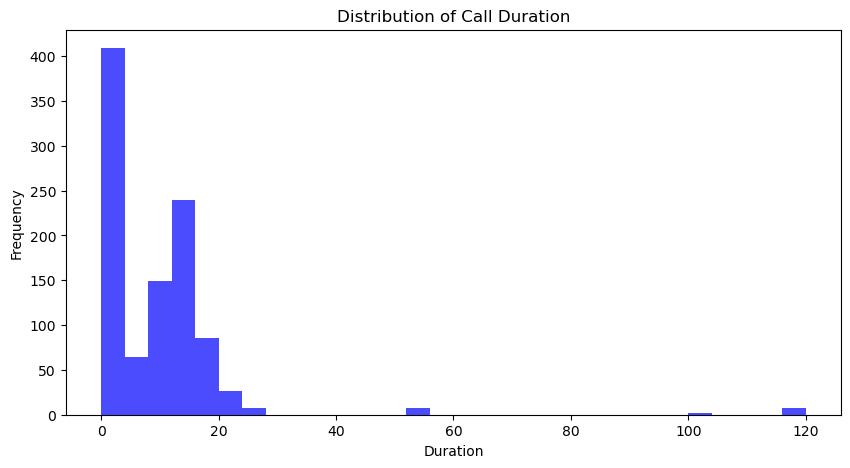

In [51]:
import matplotlib.pyplot as plt

# Visualize the Duration column
plt.figure(figsize=(10, 5))
plt.hist(activity_data['Duration'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


In [53]:
# Save the new pre-processed dataset
activity_data.to_csv('Cleaned_ActivityData.csv', index=False)
